# Ephemeris conversion guide

In [1]:
from importlib.metadata import version
import os

try:
    import xradio

    print("XRADIO version", version("xradio"), "already installed.")
except ImportError as e:
    print(e)
    print("Installing XRADIO")

    os.system("pip install xradio")

    import xradio

    print("xradio version", version("xradio"), " installed.")


# These are the three API functions that are currently supported
from xradio.image import load_image, read_image, write_image

XRADIO version 0.0.60 already installed.


## Download dataset

https://open-bitbucket.nrao.edu/projects/CASA/repos/casatestdata/browse/unittest/tclean/venus_ephem_test.ms

In [2]:
import toolviper
ms_file = "venus_ephem_test.ms"
toolviper.utils.data.download(file=ms_file)

[2025-10-02 14:57:56,575]     INFO    viperlog:  Module path: /Users/jsteeb/Dropbox/toolviper/src/toolviper 
[2025-10-02 14:57:56,578]     INFO    viperlog:  Downloading from [cloudflare] .... 


 Download List        
 ───────────────────── 
  venus_ephem_test.ms

[2025-10-02 14:57:56,582]     INFO    viperlog:  File exists: venus_ephem_test.ms 


Output()

## Convert to Processing Set

In [3]:
from xradio.measurement_set import convert_msv2_to_processing_set
ms_file = "venus_ephem_test.ms"

main_chunksize = {"frequency": 1, "time": 20}  # baseline, polarization
outfile = "venus_ephem_test.ps.zarr"
convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=outfile,
    parallel_mode="none",
    overwrite=True,
    main_chunksize=main_chunksize,
)

[2025-10-02 14:57:56,704]     INFO    viperlog:  Updated partition scheme used: ['DATA_DESC_ID', 'OBS_MODE', 'OBSERVATION_ID', 'EPHEMERIS_ID'] 
[2025-10-02 14:57:56,706]     INFO    viperlog:  Number of partitions: 1 
[2025-10-02 14:57:56,706]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], FIELD [0, 1, 2, 3, 4, 5, 6], SCAN [7, 11], EPHEMERIS [0] 


## Processing Set

In [4]:
ps_name = outfile

from xradio.measurement_set import open_processing_set

ps_xdt = open_processing_set(ps_store=outfile)
ps_xdt.xr_ps.summary()

,name,scan_intents,shape,execution_block_UID,polarization,scan_name,spw_name,spw_intents,field_name,source_name,line_name,field_coords,session_reference_UID,scheduling_block_UID,project_UID,start_frequency,end_frequency
0,venus_ephem_test_0,[OBSERVE_TARGET#ON_SOURCE],"(140, 1128, 1, 2)",uid://A002/Xd7be9d/X499e,"[XX, YY]","[11, 7]",X1847499280#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,UNSPECIFIED,"[Venus_0, Venus_1, Venus_2, Venus_3, Venus_4, ...",[Venus_0],[OSSO_Line_1(ID=0)],Ephemeris,uid://A001/X133d/X169f,uid://A001/X133d/X169a,uid://A001/X12ea/X715,2.452498e+11,2.452498e+11


In [5]:


ps_xdt["venus_ephem_test_0"]

<xarray.DataTree 'venus_ephem_test_0'>
Group: /venus_ephem_test_0
│   Dimensions:                     (time: 140, baseline_id: 1128, frequency: 1,
│                                    polarization: 2, uvw_label: 3)
│   Coordinates:
│       baseline_antenna1_name      (baseline_id) <U9 41kB ...
│       baseline_antenna2_name      (baseline_id) <U9 41kB ...
│     * baseline_id                 (baseline_id) int64 9kB 0 1 2 ... 1125 1126 1127
│       field_name                  (time) <U27 15kB ...
│     * frequency                   (frequency) float64 8B 2.452e+11
│     * polarization                (polarization) <U2 16B 'XX' 'YY'
│       scan_name                   (time) <U21 12kB '7' '7' '7' ... '11' '11' '11'
│     * time                        (time) float64 1kB 1.547e+09 ... 1.547e+09
│     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 1MB ...
│       FLAG                        (time, baseline_id, frequency, polarization) bool 316kB ...
│       TIME_CENTROID               (time, baseline_id) float64 1MB ...
│       UVW                         (time, baseline_id, uvw_label) float64 4MB ...
│       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 3MB ...
│       WEIGHT                      (time, baseline_id, frequency, polarization) float32 1MB ...
│   Attributes:
│       creation_date:     2025-10-02T18:57:56.772280+00:00
│       creator:           {'software_name': 'xradio', 'version': '0.0.60'}
│       data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'date': '20...
│       observation_info:  {'execution_block_UID': 'uid://A002/Xd7be9d/X499e', 'o...
│       processor_info:    {'sub_type': 'ALMA_CORRELATOR_MODE', 'type': 'CORRELAT...
│       schema_version:    4.0.-9986
│       type:              visibility
├── Group: /venus_ephem_test_0/antenna_xds
│       Dimensions:                 (antenna_name: 47, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * antenna_name            (antenna_name) <U9 2kB 'DA41_A058' ... 'DV25_A006'
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│           mount                   (antenna_name) <U6 1kB ...
│           polarization_type       (antenna_name, receptor_label) <U1 376B ...
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           station_name            (antenna_name) <U4 752B ...
│           telescope_name          (antenna_name) <U4 752B ...
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 376B ...
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 1kB ...
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 752B ...
│       Attributes:
│           overall_telescope_name:  ALMA
│           relocatable_antennas:    True
│           type:                    antenna
├── Group: /venus_ephem_test_0/field_and_source_base_xds
│       Dimensions:                       (time: 140, sky_dir_label: 2,
│                                          sky_dis_label: 1, line_label: 1,
│                                          cartesian_pos_label: 3, time_ephemeris: 2,
│                                          ellipsoid_dir_label: 2,
│                                          ellipsoid_dis_label: 1)
│       Coordinates:
│         * cartesian_pos_label           (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│         * ellipsoid_dir_label           (ellipsoid_dir_label) <U3 24B 'lon' 'lat'
│         * ellipsoid_dis_label           (ellipsoid_dis_label) <U4 16B 'dist'
│           field_name                    (time) <U27 15kB 'Venus_1' ... 'Venus_6'
│         * line_label                    (line_label) <U21 84B '0'
│           line_name                     (time, line_label) <U17 10kB 'OSSO_Line_1(I...
│         * sky_dir_label                 (sky_dir_l

In [6]:
ms_xdt = ps_xdt["venus_ephem_test_0"]
ms_xdt.observation_info

{'execution_block_UID': 'uid://A002/Xd7be9d/X499e',
 'observer': ['sv2421'],
 'observing_log': '',
 'project_UID': 'uid://A001/X12ea/X715',
 'release_date': '1858-11-17T00:00:00.000000000',
 'scheduling_block_UID': 'uid://A001/X133d/X169a',
 'session_reference_UID': 'uid://A001/X133d/X169f'}

In [7]:
ms_xdt["antenna_xds"]   # or ms_xdt.antenna_xds

<xarray.DataTree 'antenna_xds'>
Group: /venus_ephem_test_0/antenna_xds
    Dimensions:                 (time: 140, baseline_id: 1128, frequency: 1,
                                 polarization: 2, uvw_label: 3, antenna_name: 47,
                                 cartesian_pos_label: 3, receptor_label: 2)
    Coordinates:
      * antenna_name            (antenna_name) <U9 2kB 'DA41_A058' ... 'DV25_A006'
      * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
        mount                   (antenna_name) <U6 1kB ...
        polarization_type       (antenna_name, receptor_label) <U1 376B ...
      * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
        station_name            (antenna_name) <U4 752B ...
        telescope_name          (antenna_name) <U4 752B ...
    Inherited coordinates:
      * baseline_id             (baseline_id) int64 9kB 0 1 2 3 ... 1125 1126 1127
      * frequency               (frequency) float64 8B 2.452e+11
      * polarization            (polarization) <U2 16B 'XX' 'YY'
      * time                    (time) float64 1kB 1.547e+09 1.547e+09 ... 1.547e+09
      * uvw_label               (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        ANTENNA_DISH_DIAMETER   (antenna_name) float64 376B ...
        ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 1kB ...
        ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 752B ...
    Attributes:
        overall_telescope_name:  ALMA
        relocatable_antennas:    True
        type:                    antenna

In [8]:
ms_xdt.xr_ms.get_field_and_source_xds()

<xarray.DatasetView> Size: 56kB
Dimensions:                       (time: 140, sky_dir_label: 2,
                                   sky_dis_label: 1, line_label: 1,
                                   cartesian_pos_label: 3, time_ephemeris: 2,
                                   ellipsoid_dir_label: 2, baseline_id: 1128,
                                   frequency: 1, polarization: 2, uvw_label: 3,
                                   ellipsoid_dis_label: 1)
Coordinates: (12/15)
  * baseline_id                   (baseline_id) int64 9kB 0 1 2 ... 1126 1127
  * frequency                     (frequency) float64 8B 2.452e+11
  * polarization                  (polarization) <U2 16B 'XX' 'YY'
  * time                          (time) float64 1kB 1.547e+09 ... 1.547e+09
  * uvw_label                     (uvw_label) <U1 12B 'u' 'v' 'w'
  * cartesian_pos_label           (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    ...                            ...
  * line_label                    (line_label) <U21 84B '0'
    line_name                     (time, line_label) <U17 10kB 'OSSO_Line_1(I...
  * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
  * sky_dis_label                 (sky_dis_label) <U4 16B 'dist'
    source_name                   (time) <U27 15kB 'Venus_0' ... 'Venus_0'
  * time_ephemeris                (time_ephemeris) float64 16B 1.547e+09 1.54...
Data variables:
    FIELD_PHASE_CENTER_DIRECTION  (time, sky_dir_label) float64 2kB ...
    FIELD_PHASE_CENTER_DISTANCE   (time, sky_dis_label) float64 1kB ...
    LINE_REST_FREQUENCY           (time, line_label) float64 1kB ...
    LINE_SYSTEMIC_VELOCITY        (time, line_label) float64 1kB ...
    OBSERVER_POSITION             (cartesian_pos_label) float64 24B ...
    SOURCE_DIRECTION              (time_ephemeris, sky_dir_label) float64 32B ...
    SOURCE_DISTANCE               (time_ephemeris, sky_dis_label) float64 16B ...
    SOURCE_RADIAL_VELOCITY        (time_ephemeris) float64 16B ...
    SUB_OBSERVER_DIRECTION        (time_ephemeris, ellipsoid_dir_label) float64 32B ...
Attributes:
    type:     field_and_source_ephemeris

In [9]:
ms_xdt.xr_ms.get_field_and_source_xds().FIELD_PHASE_CENTER_DIRECTION.isel(time=0,drop=True).to_dict()

{'dims': ('sky_dir_label',),
 'attrs': {'frame': 'icrs', 'type': 'sky_coord', 'units': 'rad'},
 'data': [-2.1054387263055148, -0.2961237230862559],
 'coords': {'sky_dir_label': {'dims': ('sky_dir_label',),
   'attrs': {},
   'data': ['ra', 'dec']}},
 'name': 'FIELD_PHASE_CENTER_DIRECTION'}

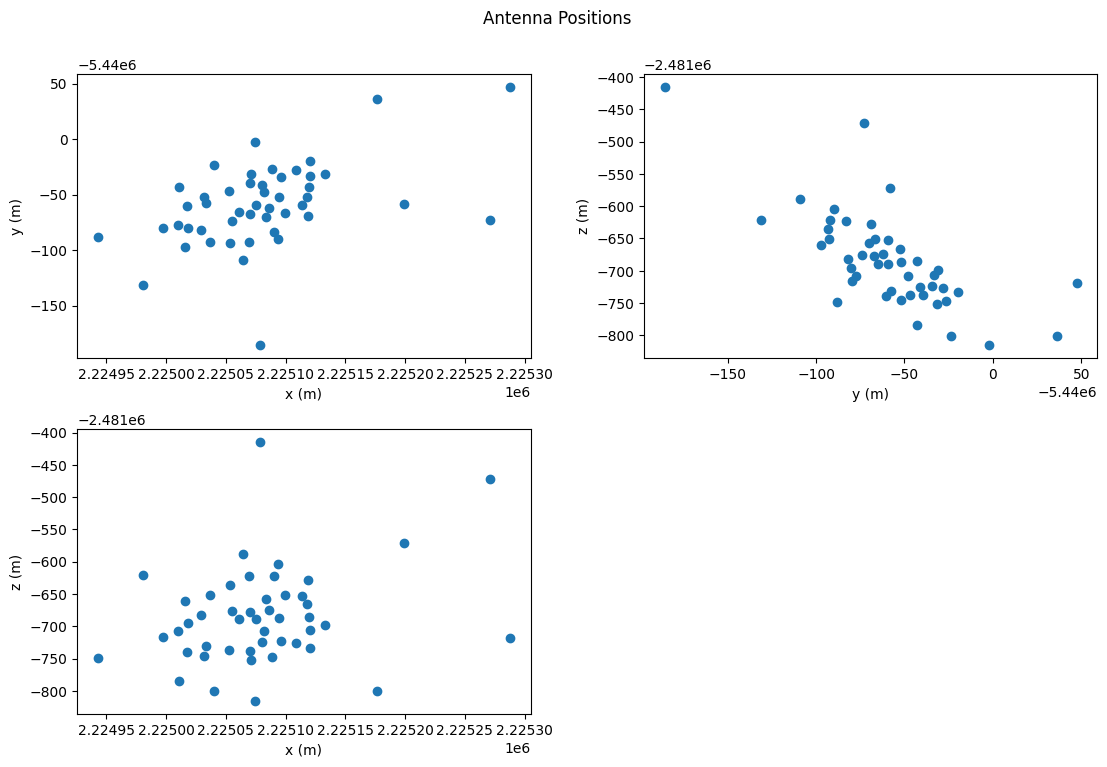

In [10]:
ps_xdt.xr_ps.plot_antenna_positions(label_all_antennas=False)

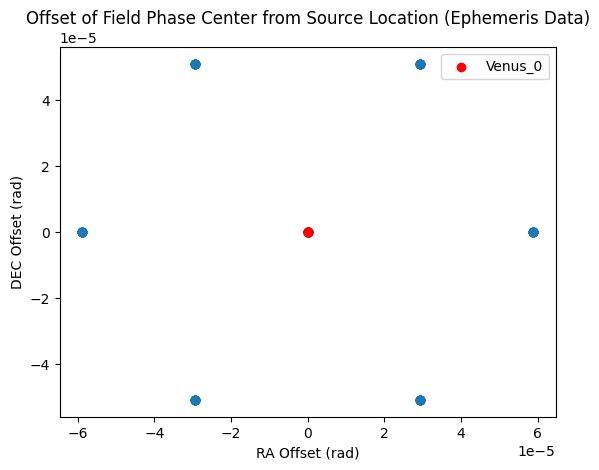

In [11]:
ps_xdt.xr_ps.plot_phase_centers()

In [12]:
import xarray as xr
xds = xr.DataArray([0,0,0], dims=["time"], coords={"time": [0, 1, 2]})
xds.attrs = {"test":0, "test2": 1}
xds

<xarray.DataArray (time: 3)> Size: 24B
array([0, 0, 0])
Coordinates:
  * time     (time) int64 24B 0 1 2
Attributes:
    test:     0
    test2:    1

In [13]:
xds = xds*10
xds

<xarray.DataArray (time: 3)> Size: 24B
array([0, 0, 0])
Coordinates:
  * time     (time) int64 24B 0 1 2

In [14]:
import numpy as np

dis =  {
                "attrs": {
                    "coordinate_system": "geocentric",
                    "frame": "ITRF",
                    "origin_object_name": "earth",
                    "type": "location",
                    "units": "m",
                },
                "data": [6379946.01326443],
                "dims": ("sky_dis_label",),
                "coords":  {'sky_dis_label': {'dims': ('sky_dis_label',),
                    'data': ['m']}
                },
            }


dir =  {
                "attrs": {
                    "coordinate_system": "geocentric",
                    "frame": "ITRF",
                    "origin_object_name": "earth",
                    "type": "location",
                    "units": "rad",
                },
                "data": np.array([-1.1825465955049892, -0.3994149869262738]),
                "dims" : ("sky_dir_label",),
                "coords":  {'sky_dir_label': {'dims': ('sky_dir_label',),
                    'data': ['ra', 'dec']}
                },
                
            }

dir

{'attrs': {'coordinate_system': 'geocentric',
  'frame': 'ITRF',
  'origin_object_name': 'earth',
  'type': 'location',
  'units': 'rad'},
 'data': array([-1.1825466 , -0.39941499]),
 'dims': ('sky_dir_label',),
 'coords': {'sky_dir_label': {'dims': ('sky_dir_label',),
   'data': ['ra', 'dec']}}}

In [15]:
import xarray as xr


xr.DataArray.from_dict(dir)

<xarray.DataArray (sky_dir_label: 2)> Size: 16B
array([-1.1825466 , -0.39941499])
Coordinates:
  * sky_dir_label  (sky_dir_label) <U3 24B 'ra' 'dec'
Attributes:
    coordinate_system:   geocentric
    frame:               ITRF
    origin_object_name:  earth
    type:                location
    units:               rad